In [26]:
import pandas as pd
# Read a CSV file
data = pd.read_csv('../../datasets/cleaned_loss_rate_dataset.csv')
# Display the dataframe
data.head(3)

,Month,category_name,item_name,unit_selling_price_rmb/kg,wholesale_price_(rmb/kg),loss_rate_(%),total_sales
0,1,capsicum,Green Hot Peppers,8.287794,5.049097,6.72,28.38
1,1,capsicum,Green Hot Peppers,8.287794,5.049097,6.72,15.48
2,1,flower,Yunnan Lettuces,6.000000,3.190000,12.81,3.00


In [27]:
data.shape

(475174, 7)

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming 'Loss Rate (%)' is the target variable
y = data['loss_rate_(%)']

# Select features for model training
numerical_columns = ['Month', 'unit_selling_price_rmb/kg', 'wholesale_price_(rmb/kg)', 'total_sales']
categorical_columns = ['category_name', 'item_name']

In [35]:
# Extract numerical features
X_numerical = data[numerical_columns]

In [36]:
# Extract categorical features
X_categorical = data[categorical_columns]

In [37]:
# Apply one-hot encoding using pd.get_dummies for categorical variables
X_categorical_encoded = pd.get_dummies(X_categorical, columns=categorical_columns, drop_first=True)
X_categorical_encoded.sample(3)

,category_name_cabbage,category_name_capsicum,category_name_flower,category_name_mushroom,category_name_solanum,item_name_Agaricus Bisporus (Bag),item_name_Aihao,item_name_Amaranth,item_name_Amaranth (Bag),item_name_Apricot Bao Mushroom (1),...,item_name_Yunnan Lettuce (Bag),item_name_Yunnan Lettuces,item_name_Yunnan Shengcai,item_name_Yuxingcao (Bag),item_name_Zhijiang Qinggengsanhua,item_name_Zhijiang Red Bolt,item_name_Zhijiang Red Bolt (Bag),item_name_Zhimaxiancai,item_name_Zhuyecai,item_name_Zhuyecai (Bag)
18265,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29460,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2874,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [38]:
# Concatenate numerical and encoded categorical features
X = pd.concat([X_numerical, X_categorical_encoded], axis=1)

In [39]:
# Split data into training and test sets (75% training, 25% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [40]:
# Display the columns of X_test
print("\nColumns of X_test:")
print(X_test.columns)


Columns of X_test:
Index(['Month', 'unit_selling_price_rmb/kg', 'wholesale_price_(rmb/kg)',
       'total_sales', 'category_name_cabbage', 'category_name_capsicum',
       'category_name_flower', 'category_name_mushroom',
       'category_name_solanum', 'item_name_Agaricus Bisporus (Bag)',
       ...
       'item_name_Yunnan Lettuce (Bag)', 'item_name_Yunnan Lettuces',
       'item_name_Yunnan Shengcai', 'item_name_Yuxingcao (Bag)',
       'item_name_Zhijiang Qinggengsanhua', 'item_name_Zhijiang Red Bolt',
       'item_name_Zhijiang Red Bolt (Bag)', 'item_name_Zhimaxiancai',
       'item_name_Zhuyecai', 'item_name_Zhuyecai (Bag)'],
      dtype='object', length=185)


In [41]:
# Initialize and train a linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)

In [42]:
from sklearn.metrics import mean_absolute_error
# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Round the MAE to 4 decimal places
rounded_mae = round(mae, 4)

print(f"Mean Absolute Error (MAE): {rounded_mae}")

Mean Absolute Error (MAE): 0.0


In [43]:
from sklearn.linear_model import Lasso
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
lasso_predictions = lasso_model.predict(X_test)
lasso_mae = mean_absolute_error(y_test, lasso_predictions)
print(f"MAE for Lasso Regression: {lasso_mae:.4f}")

MAE for Lasso Regression: 3.6440


In [44]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_mae = mean_absolute_error(y_test, dt_predictions)
print(f"MAE for Decision Tree Regressor: {dt_mae:.4f}")

MAE for Decision Tree Regressor: 0.0002


In [45]:
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Round the MSE to 4 decimal places
rounded_mse = round(mse, 4)

print(f"Mean Squared Error (MSE): {rounded_mse}")

Mean Squared Error (MSE): 0.0


In [46]:
# Predict Loss Rate for the first 5 values in the test data
X_test_subset = X_test.head()
predictions = model.predict(X_test_subset)

# Display the results along with Month, Item Name, Category Name, and Discount information
result_df = pd.DataFrame({
    'Month': data.loc[X_test_subset.index, 'Month'],  # Assuming 'Month' is the original month numbers
    'Predicted Loss Rate (%)': predictions
})
result_df.head()

,Month,Predicted Loss Rate (%)
399361,8,9.43
120141,6,7.80
244048,11,5.70
66620,3,5.86
340206,5,15.61


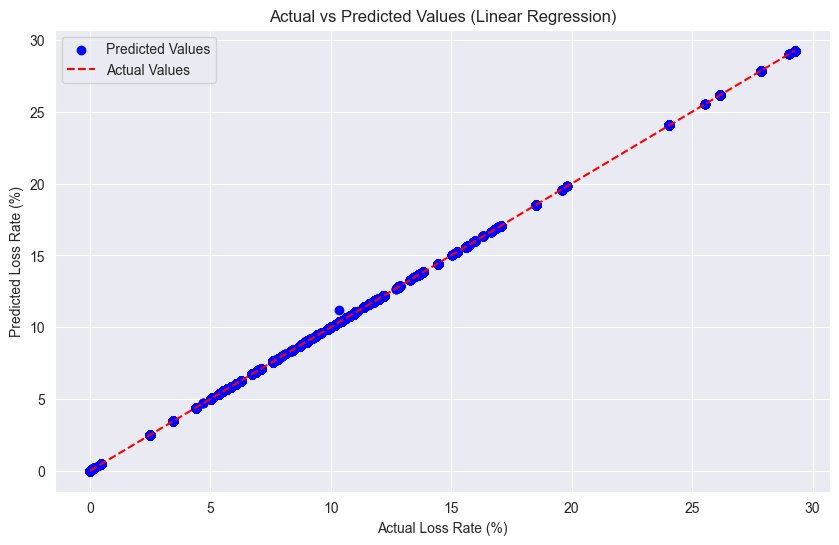

In [47]:
import matplotlib.pyplot as plt
# Visualize actual vs predicted values for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Actual Values')
plt.xlabel('Actual Loss Rate (%)')
plt.ylabel('Predicted Loss Rate (%)')
plt.title('Actual vs Predicted Values (Linear Regression)')
plt.legend()
plt.show()

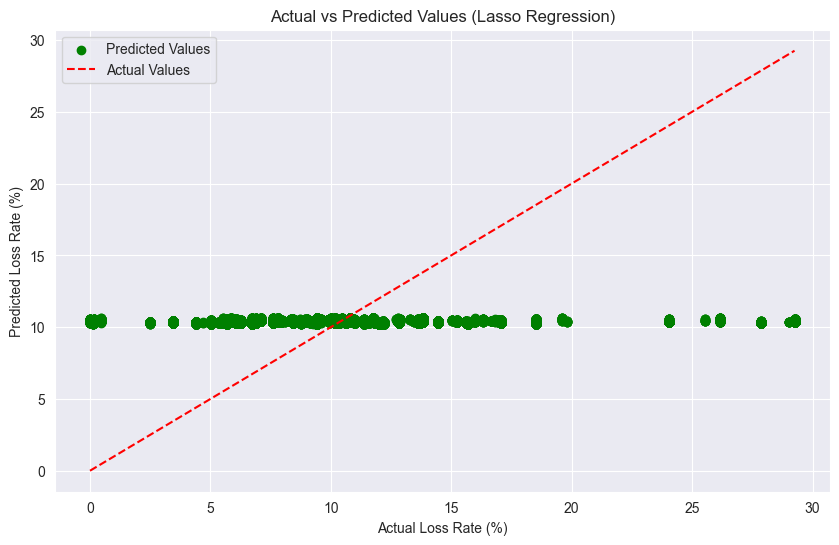

In [48]:
# Visualize actual vs predicted values for Lasso Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lasso_predictions, color='green', label='Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Actual Values')
plt.xlabel('Actual Loss Rate (%)')
plt.ylabel('Predicted Loss Rate (%)')
plt.title('Actual vs Predicted Values (Lasso Regression)')
plt.legend()
plt.show()


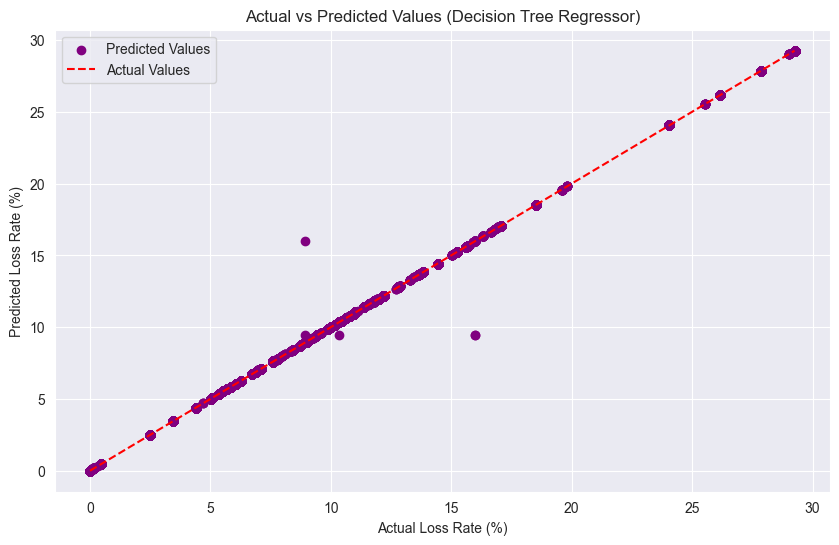

In [49]:
# Visualize actual vs predicted values for Decision Tree Regressor
plt.figure(figsize=(10, 6))
plt.scatter(y_test, dt_predictions, color='purple', label='Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Actual Values')
plt.xlabel('Actual Loss Rate (%)')
plt.ylabel('Predicted Loss Rate (%)')
plt.title('Actual vs Predicted Values (Decision Tree Regressor)')
plt.legend()
plt.show()

In [50]:
y_test[:5]

399361     9.43
120141     7.80
244048     5.70
66620      5.86
340206    15.61
Name: loss_rate_(%), dtype: float64

In [51]:
predictions[:5]

array([ 9.43,  7.8 ,  5.7 ,  5.86, 15.61])

In [52]:
y_test.shape[0]

118794

In [53]:
import pickle

# save model
with open('lossRatemodel.pickle', 'wb') as file:
    pickle.dump(model, file)